In [1]:
# Dependencies 

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import sqlite3
import numpy as np
import pandas as pd

In [2]:
# Create the connection
cnx = sqlite3.connect(r'wine_data.sqlite')

# create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM wine_data", cnx)

In [3]:
df = pd.read_sql('Select * from wine_data where price < 100 and price in (select price from wine_data group by price having count(price) > 10)', cnx)

In [4]:
features_df = df.copy()
del features_df['price']
del features_df['index']
del features_df['description']
del features_df['title']
del features_df['province']
del features_df['winery']
del features_df['country']
del features_df['color']
del features_df['variety']
del features_df['provinceID']
del features_df['wineryID']
del features_df['level_0']
features_df.head(10)

,rating,countryID,varietyID,colorID
0,87,0,0,0
1,85,0,0,0
2,87,0,0,0
3,93,0,0,0
4,87,0,0,0
5,85,0,0,0
6,92,0,0,0
7,85,0,0,0
8,92,0,0,0
9,91,0,0,0


In [5]:
df.head()

,level_0,index,country,description,rating,price,province,title,variety,winery,color,countryID,varietyID,colorID,provinceID,wineryID
0,0,0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,red,0,0,0,0,0
1,1,1366,Portugal,This wine is light in tannins and ripe in frui...,85,11.0,Douro,Quinta dos Avidagos 2015 Lote 138 Red (Douro),Portuguese Red,Quinta dos Avidagos,red,0,0,0,0,0
2,2,4018,Portugal,Towards the western end of the Douro vineyards...,87,15.0,Douro,Quinta dos Avidagos 2014 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,red,0,0,0,0,0
3,3,18808,Portugal,This Avidagos vineyard in the Corgo River Vall...,93,65.0,Douro,Quinta dos Avidagos 2011 Lenuma Red (Douro),Portuguese Red,Quinta dos Avidagos,red,0,0,0,0,0
4,4,56322,Portugal,"This is a balanced, ripe wine. Soft tannins su...",87,29.0,Douro,Quinta dos Avidagos 2012 Premium Red (Douro),Portuguese Red,Quinta dos Avidagos,red,0,0,0,0,0


# Setting Model for Price

In [6]:
# Setting Input & Output values for Multiple Linear Regression Model for Price

X = features_df.values
y = df['price'].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 233.82562876602185, R2: 0.34101516983957714


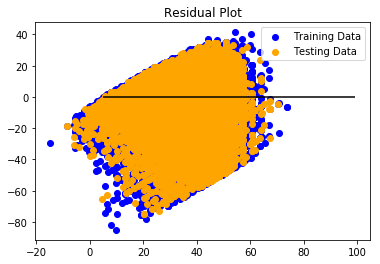

In [11]:
# Making Residual Plot to see if Linear Regression is a good Predictor

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [12]:
predictions = model.predict(X_test).round()
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [25.0, 16.0, 18.0, 37.0, 13.0, 29.0, 12.0, 47.0, 37.0, 27.0]
First 10 Actual labels: [20.0, 14.0, 18.0, 40.0, 13.0, 15.0, 14.0, 27.0, 55.0, 21.0]


In [13]:
from sklearn.externals import joblib
joblib.dump(model, 'MLR_price_model.sav')

['MLR_price_model.sav']

In [14]:
price_model = joblib.load('MLR_price_model.sav')

In [15]:
price_prediction = price_model.predict(X_test).round()
print(f"First 10 Predictions:   {price_prediction[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [25.0, 16.0, 18.0, 37.0, 13.0, 29.0, 12.0, 47.0, 37.0, 27.0]
First 10 Actual labels: [20.0, 14.0, 18.0, 40.0, 13.0, 15.0, 14.0, 27.0, 55.0, 21.0]


In [16]:
def price_test_model(price, country, variety, color):
    
    dfco = df.loc[(df.country == country)][:1]
    dfv = df.loc[(df.variety == variety)][:1]
    dfc = df.loc[(df.color == color)][:1]
  
    a = list(dfco['countryID'])
    b = list(dfv['varietyID'])
    c = list(dfv['colorID'])   

    dft = pd.DataFrame({'price':price,
                        "countryID":a,
                        "varietyID":b,
                        "colorID":c,})
    
    return price_model.predict(dft).round()

In [17]:
price_test_model(87, 'Portugal','Portuguese Red','red')

array([31.])

In [18]:
price = list(df['price'][:1])
print(f"Actual Price: {price}")

Actual Price: [15.0]
